Names: Guy Cohen, Shahar Amram

ID's: 206463606, 205457898

In [57]:
#We are importing all necessary libraries to implement our model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


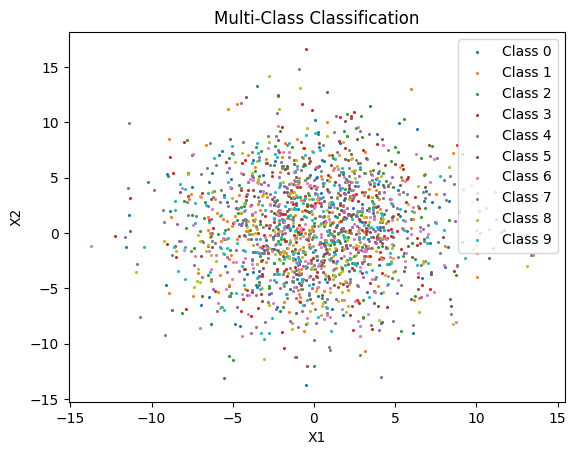

 ================================================================After Normalize X:============================================================
X mean:  -8.615503660766726e-17
X std:  1.0


In [58]:
X = np.loadtxt("ex2_x_data.csv", delimiter=',')
Y = np.loadtxt("ex2_y_data.csv", delimiter=',')



# Assuming X and Y have the same number of rows
assert X.shape[0] == Y.shape[0], "Number of rows in X and Y must be the same"

# Create an array of indices
indices = np.arange(X.shape[0])

# Shuffle the indices randomly
np.random.shuffle(indices)

# Shuffle X and Y based on the shuffled indices
shuffled_X = X[indices]
shuffled_Y = Y[indices]

X=shuffled_X
Y=shuffled_Y



# Assuming X has two features (X1 and X2)
# Assuming Y contains class labels (0, 1, 2, ...)
# Modify the code accordingly if your data is different


# Create a separate scatter plot for each class
for class_label in np.unique(Y):
    class_data = X[Y == class_label]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=f"Class {class_label.astype(int)}", s=1.5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Multi-Class Classification')
plt.legend()
plt.show()

# ================================================================above important============================================================


# standardizes the input
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

# A small constant value 1e-8 is added to the standard deviation to avoid division by zero.
X_std[X_std == 0] = 1e-8  # avoid division by zero

X = (X - X_mean) / X_std

print(" ================================================================After Normalize X:============================================================")
print("X mean: ", np.mean(X))
print("X std: ", np.std(X))


#  limit the values in the data array to be between -3 and 3. 
X[X > 3] = 3
X[X < -3] = -3


In [59]:
# Add a column of ones to the X matrix
X = np.insert(X, 0, 1, axis=1)

sigmoid(x) = 1 / (1 + e^(-x))

J(theta) = (-1/m) * sum(y*log(h) + (1-y)*log(1-h))

theta_j := theta_j - alpha * (1/m) * sum((h_theta(x^(i)) - y^(i)) * x_j^(i))




In [60]:
class LogisticRegression:
    
    # Constructor that intializes the alpha value and iteration value
    def __init__(self, alpha=0.01, num_iterations=2000):
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.cost_history=[] # Initialize an empty list to store the cost values
        self.theta = []  # Initialize an empty list to store the theta values

    # Calculates the sigmoid value, g(z).
    def sigmoid_function(self, z):
        return 1/(1+np.exp(-z))

    # Calculates the cost value
    def cost_function(self, h , y):
        epsilon = 1e-8  # small value to avoid log(0)
        cost = -(1 / len(y)) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
        return cost

    # Calculates the theta value by gradient descent
    def gradient_descent(self, x, h, theta, y, m):
        gradient_value = np.dot(x.T, (h - y)) / m
        theta -= self.alpha * gradient_value
        return theta

    # Fit the model using one-vs-all approach. Train the model.
    def fit(self, x, y):
        num_classes = np.unique(y).shape[0]#returns an array containing the unique elements in y, sorted in ascending order. We have 10 classes in this example
        num_features = x.shape[1]#calculates the number of features in the input variable x. We have 65 features in this example

        #For each class in the 10 classes we have
        for class_label in range(num_classes):
            cost = []
            class_y = np.where(y == class_label, 1, 0)#Checks if each element of y is equal to class_label and assigns 1 to the corresponding element in class_y if the condition is true, otherwise assigns 0. 
            theta = np.zeros(num_features)
            for i in range(self.num_iterations):
                h = self.sigmoid_function(x.dot(theta))#h=g(x*theta)
                theta = self.gradient_descent(x, h, theta, class_y, len(class_y))
                cost.append(self.cost_function(h,class_y)) 
            self.theta.append((theta, class_label))
            self.cost_history.append((cost,class_label))
        return self.theta, self.cost_history # Return both the theta values and cost history

    # Uses to classify input data based on the trained logistic regression model. 
    def predict(self, X):
        X_predicted = [max(((self.sigmoid_function(i.dot(theta)), c) for theta, c in self.theta), key=lambda x: x[0])[1] for i in X]
        return X_predicted

    # Visualizes the convergence behavior of the cost function during the training process
    def Plotcost(self, costh):
        plt.figure()
        for cost, c in costh:
            iterations = range(len(cost))
            plt.plot(iterations, cost, label="Class " + str(c), linewidth=0.5)  # Adjust the 'linewidth' parameter for line thickness
        plt.title("Graph depicting the convergence behavior of the cost function")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.legend()
        plt.show()





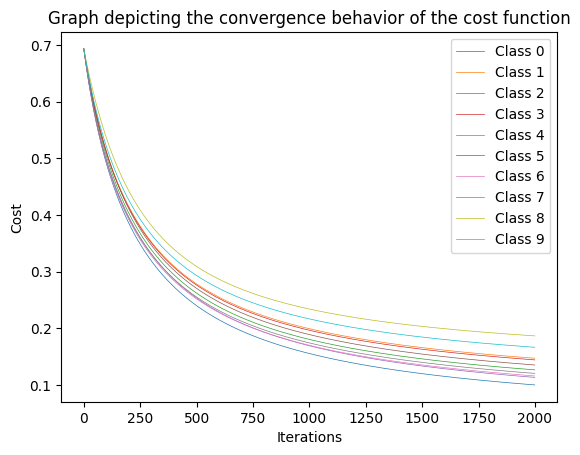

In [61]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
logi = LogisticRegression()
logi.fit(X_train, y_train)
predition = logi.predict(X_test)

logi.Plotcost(logi.cost_history)  # Here we are plotting the Cost value and showing how it is depreciating close to 0 with each iteration


In [62]:

confusion_mat = confusion_matrix(y_test, predition)
print("====================Train Confusion Matrix:====================\n")
print(confusion_mat)
print("\n=========================================================")


====================Train Confusion Matrix:====================

[[59  0  0  0  0  0  1  0  0  0]
 [ 0 45  4  0  1  1  4  3  2  4]
 [ 1  1 58  1  0  0  0  0  2  0]
 [ 0  1  1 52  0  3  1  1  1  7]
 [ 0  4  0  0 50  0  2  1  1  0]
 [ 0  1  0  1  1 47  0  1  0  3]
 [ 0  1  0  0  0  1 51  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  1]
 [ 0  8  0  4  1  3  2  1 32  7]
 [ 2  0  1  1  1  1  1  2  1 50]]



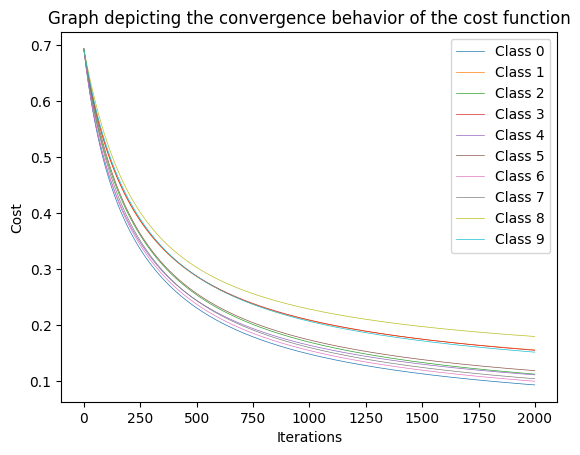

In [63]:

logi1 = LogisticRegression()
logi1.fit(X_test, y_test)
predition1 = logi1.predict(X_test)

logi.Plotcost(logi1.cost_history)  # Here we are plotting the Cost value and showing how it is depreciating close to 0 with each iteration


In [64]:
confusion_mat = confusion_matrix(y_test, predition1)
print("====================Test Confusion Matrix:====================\n")
print(confusion_mat)
print("\n=========================================================")


====================Test Confusion Matrix:====================

[[60  0  0  0  0  0  0  0  0  0]
 [ 0 58  1  0  0  0  1  2  0  2]
 [ 1  0 62  0  0  0  0  0  0  0]
 [ 0  0  3 60  0  2  1  1  0  0]
 [ 0  1  0  0 55  0  1  1  0  0]
 [ 0  1  0  0  1 50  0  0  0  2]
 [ 0  1  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 57  0  0]
 [ 0  9  0  3  0  2  0  1 43  0]
 [ 0  1  0  2  0  2  0  1  0 54]]



                                        Conclusion:


The rows of the matrix represent the true classes, while the columns represent the predicted classes.

The numbers in the matrix represent the number of instances that were classified in each category. For example, the number ,lets call it temp, in the top left corner of the matrix means that there were temp instances that were actually in class 0 and were correctly classified as class 0.

The diagonal elements of the matrix (the elements that run from top left to bottom right) represent the number of instances that were correctly classified. 
The off-diagonal elements represent the number of instances that were misclassified.

The confusion matrix provides valuable information about the performance of the classifier for each class, allowing you to analyze the accuracy, precision, recall, and other metrics for your model.

accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP)

recall = TP / (TP + FN)

In this example we can see that the number of false positives, FP , is relatively high.
This means that the classifier is sometimes incorrectly classifying instances as positive. 
This could be a problem if the classifier is being used to make decisions that have important consequences!!!
For example: to tell sick patient that he is healthy.->. This could have serious consequences for the patient's health.